1. Import data/listings.csv into a dataframe and display the first few rows of the dataframe.

In [1]:
import pandas as pd

# Load the CSV files
listings_df = pd.read_csv('data/listings.csv')

print(listings_df.head())

       id                          listing_url       scrape_id last_scraped  \
0  155305  https://www.airbnb.com/rooms/155305  20240621025915   2024-06-21   
1  156805  https://www.airbnb.com/rooms/156805  20240621025915   2024-06-21   
2  156926  https://www.airbnb.com/rooms/156926  20240621025915   2024-06-21   
3  197263  https://www.airbnb.com/rooms/197263  20240621025915   2024-06-21   
4  209068  https://www.airbnb.com/rooms/209068  20240621025915   2024-06-21   

        source                                    name  \
0  city scrape      Cottage! BonPaul + Sharky's Hostel   
1  city scrape       Private Room "Ader" at BPS Hostel   
2  city scrape  Mixed Dorm "Top Bunk #1" at BPS Hostel   
3  city scrape            Tranquil Room & Private Bath   
4  city scrape                         Terrace Cottage   

                                         description  \
0                                                NaN   
1                                                NaN   
2  This 

2. Show the column names of the dataframe.

In [5]:
print(listings_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

3. Find the average `reviews_per_month`.

In [10]:
average_reviews_per_month = listings_df['reviews_per_month'].mean()
print(average_reviews_per_month)

2.5002987197724043


4. Find the maximum `reviews_per_month` of the listings.

In [11]:
max_reviews_per_month = listings_df['reviews_per_month'].max()
print(max_reviews_per_month)

23.27


5. Add a column `reviews_per_month_grouping` to the dataframe. Group `reviews_per_month` into 5 groups: 

"No Reviews" = 0,

"Few" = >0 to <5,

"Good" = >5 to <12,

"Great" = >12 to <20,

"Fire" = >20.

In [24]:
def categorize_reviews_per_month(reviews_per_month):
    if reviews_per_month == 0:
        return 'No Reviews'
    elif 0 < reviews_per_month < 5:
        return 'Few'
    elif 5 <= reviews_per_month < 10:
        return 'Good'
    elif 10 <= reviews_per_month < 20:
        return 'Great'
    elif reviews_per_month >= 20:
        return 'Fire'
    else:
        return 'Unknown'
    
listings_df['reviews_per_month_category'] = listings_df['reviews_per_month'].apply(categorize_reviews_per_month)
print(listings_df[['reviews_per_month', 'reviews_per_month_category']].head())

   reviews_per_month reviews_per_month_category
0               2.78                        Few
1               0.43                        Few
2               2.17                        Few
3               0.57                        Few
4               0.42                        Few


6. Create a bar plot of the `reviews_per_month_grouping`.

In [25]:
reviews_per_month_grouping_counts = listings_df['reviews_per_month_category'].value_counts()
print(reviews_per_month_grouping_counts)

reviews_per_month_category
Few        2480
Good        313
Unknown     219
Great        18
Fire          1
Name: count, dtype: int64


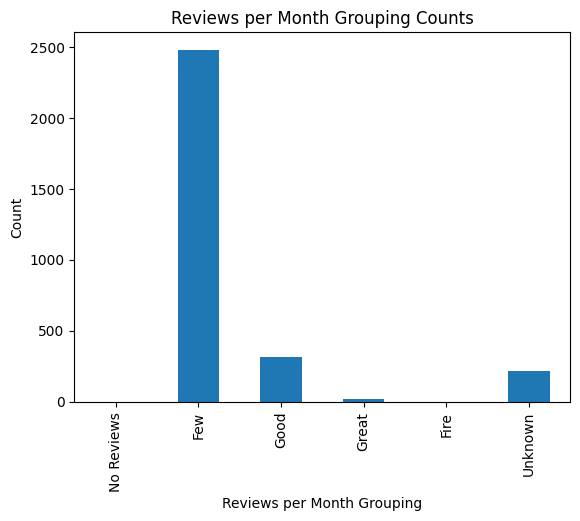

In [26]:
import matplotlib.pyplot as plt

order = ['No Reviews', 'Few', 'Good', 'Great', 'Fire', 'Unknown']

ordered_reviews_counts = reviews_per_month_grouping_counts.reindex(order)

ordered_reviews_counts.plot(kind='bar')
plt.title('Reviews per Month Grouping Counts')   
plt.ylabel('Count')
plt.xlabel('Reviews per Month Grouping')
plt.show()